In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import plotly.plotly as py
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plot

import warnings
warnings.filterwarnings('ignore')
titanic = pd.read_csv('train_titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_data=titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [5]:
titanic_data=titanic_data.dropna()

In [6]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708
10,1,3,female,4.0,1,1,16.7000


In [7]:
target = titanic_data['Survived']
titanic_data=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [8]:
for i in range(len(titanic_data)):
    if (titanic_data['Sex'].iloc[i]=='male'):
        titanic_data['Sex'].iloc[i]=0
    elif(titanic_data['Sex'].iloc[i]=='female'):
        titanic_data['Sex'].iloc[i]=1

In [9]:
titan=titanic_data

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [11]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titanic_data, target, test_size=0.20, random_state=111)

In [12]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.76


In [14]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [15]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.683012,0.657343
1,0.010,0.719790,0.727273
2,0.100,0.800350,0.769231
3,1.000,0.798599,0.755245
4,10.000,0.802102,0.776224
5,100.000,0.803853,0.776224
6,1000.000,0.803853,0.776224


In [16]:
#etkili elemanları değiştirirsek;

In [17]:
titanic_data=titanic_data[['Pclass','Sex','Age','SibSp','Parch']]

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titanic_data, target, test_size=0.20, random_state=111)

In [20]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.75


In [22]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.81
Modelin test verisindeki doğruluğu   : 0.79


In [23]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.586690,0.615385
1,0.010,0.733800,0.769231
2,0.100,0.789842,0.776224
3,1.000,0.798599,0.748252
4,10.000,0.812609,0.783217
5,100.000,0.810858,0.783217
6,1000.000,0.810858,0.783217


In [24]:
#iki sutünü birleştiriyorum,tek olarak sokulacak modele

In [25]:
titanic_data['sibparch']=titanic_data['Parch']

In [26]:
for i in range(len(titanic_data)):
    titanic_data['sibparch'].iloc[i]==titanic_data['SibSp'].iloc[i]+titanic_data['Parch'].iloc[i]
        

In [27]:
titanic_data=titanic_data[['Pclass','Sex','Age','sibparch']]

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [29]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titanic_data, target, test_size=0.20, random_state=111)

In [30]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [32]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.77


In [33]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.586690,0.615385
1,0.010,0.733800,0.762238
2,0.100,0.791594,0.776224
3,1.000,0.800350,0.776224
4,10.000,0.803853,0.762238
5,100.000,0.805604,0.769231
6,1000.000,0.805604,0.769231


In [34]:
#yukarıdaki 3 farklı modele gore en uygunu ikinci olan yanı data sında 'Pclass','Sex','Age','SibSp','Parch' sutünları olan , yani değişkenleri barındıran gibi gözüküyor, yöntem olarak ta Multinomial (Softmax) daha iyi gözüküyor 

## 3. bolum Performans Ölçüm metrikleri ödevi

In [35]:
titan=titan[['Pclass','Sex','Age','SibSp','Parch']]

In [37]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titan, target, test_size=0.20, random_state=111)
yasama_tahmin_modeli = LogisticRegression()
yasama_tahmin_modeli.fit(X_eğitim, y_eğitim)

tahmin_eğitim = yasama_tahmin_modeli.predict(X_eğitim)
tahmin_test = yasama_tahmin_modeli.predict(X_test)
tahmin_test_ihtimal = yasama_tahmin_modeli.predict_proba(X_test)[:,1]

In [38]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [39]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[289  47]
 [ 68 167]]
Hata Matrisi (Test verileri)
------------------------------
[[70 18]
 [18 37]]


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

accuracy_score() değeri         :  0.7482517482517482
precision_score() değeri        :  0.6727272727272727
recall_score() değeri        :  0.6727272727272727
Hesaplanan özgünlük değeri   :  0.7954545454545454
f1_score() değeri     :  0.6727272727272727


In [41]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        88
           1       0.67      0.67      0.67        55

   micro avg       0.75      0.75      0.75       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143

f1_score() değeri        : 0.67
recall_score() değeri    : 0.67
precision_score() değeri : 0.67


Hassasiyet : [0.79545455 0.67272727]
Duyarlılık : [0.79545455 0.67272727]
F1 Skoru   : [0.79545455 0.67272727]


In [42]:
# C degerlerine göre grafikleri çizdirelim.

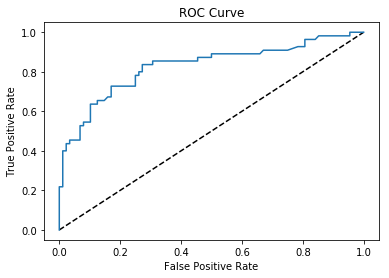

AUC Değeri :  0.8270661157024793


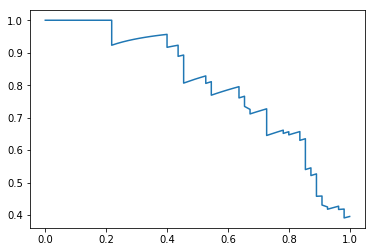

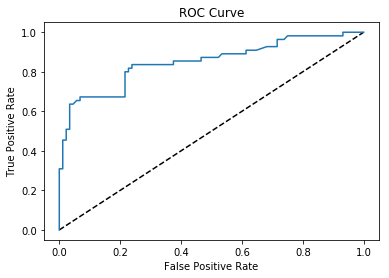

AUC Değeri :  0.85


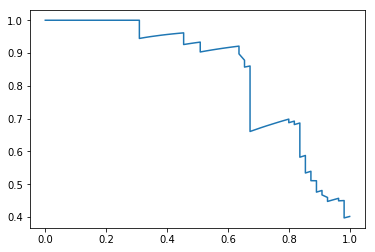

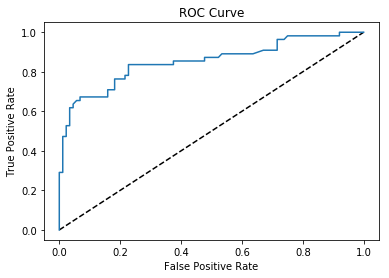

AUC Değeri :  0.8522727272727273


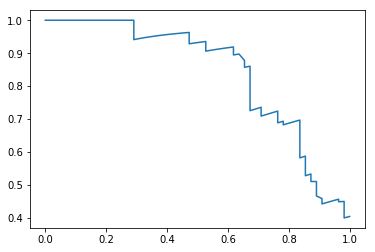

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

C_değerleri = [0.01,1,100]

for c in C_değerleri:
    # Apply logistic regression model to training data
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titan, target, test_size=0.20, random_state=111)
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)

    tahmin_eğitim = lr.predict(X_eğitim)
    tahmin_test = lr.predict(X_test)
    tahmin_test_ihtimal = lr.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))
    
    
    hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

    plt.plot(duyarlılık, hassasiyet)
    plt.show()